In [1]:
import numpy as np
from scipy.linalg import norm
from ase.build import molecule
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase.units import fs, kB
from ase.io.trajectory import Trajectory
from fireballpy import Fireball

# Define our atoms
atoms = molecule('CH4')

# Assign Fireball calculator
atoms.calc = Fireball(fdata='biology')

# Set momenta so that T = 300K initially
MaxwellBoltzmannDistribution(atoms, temperature_K=300)

# Define the integrator
dyn = VelocityVerlet(atoms, trajectory='dinamic.traj', logfile='dinamic.log', timestep=0.2*fs)

# Variables of our simulation
nsteps = 1000
nsave = 100

# Function to print us the status of the simulation
def printenergies(a=atoms):
    ep = a.get_potential_energy() / len(a)
    ek = a.get_kinetic_energy() / len(a)
    et = ep + ek
    t = ek / (1.5 * kB)
    print(f'Energy per atom: Epot = {ep:.3f}eV  Ekin = {ek:.3f}eV (T={t:.3f}K)  Etot = {et:.3f}')

# Run simulation and execute a function each nsave steps
dyn.attach(printenergies, interval=nsave)
dyn.run(nsteps)

Energy per atom: Epot = -43.337eV  Ekin = 0.047eV (T=364.920K)  Etot = -43.290
Energy per atom: Epot = -43.341eV  Ekin = 0.047eV (T=362.553K)  Etot = -43.294
Energy per atom: Epot = -43.335eV  Ekin = 0.036eV (T=275.971K)  Etot = -43.299
Energy per atom: Epot = -43.330eV  Ekin = 0.032eV (T=244.302K)  Etot = -43.299
Energy per atom: Epot = -43.329eV  Ekin = 0.035eV (T=273.852K)  Etot = -43.294
Energy per atom: Epot = -43.321eV  Ekin = 0.033eV (T=255.011K)  Etot = -43.288
Energy per atom: Epot = -43.322eV  Ekin = 0.035eV (T=271.784K)  Etot = -43.287
Energy per atom: Epot = -43.336eV  Ekin = 0.044eV (T=342.088K)  Etot = -43.292
Energy per atom: Epot = -43.339eV  Ekin = 0.041eV (T=314.488K)  Etot = -43.299
Energy per atom: Epot = -43.334eV  Ekin = 0.033eV (T=252.739K)  Etot = -43.301
Energy per atom: Epot = -43.334eV  Ekin = 0.037eV (T=287.600K)  Etot = -43.297


True

In [2]:
# Load the trajectory
traj = Trajectory('dinamic.traj')

# Allocate arrays to save
time = np.zeros(nsave + 1)
epot = np.zeros(nsave + 1)
ekin = np.zeros(nsave + 1)
forc = np.zeros(nsave + 1)
distances = np.zeros((nsave + 1, 4))

# Fill them
for i, frame in enumerate(traj[::nsteps//nsave]):
    time[i] = i*0.2*fs
    epot[i] = frame.get_potential_energy()
    ekin[i] = frame.get_kinetic_energy()
    forc[i] = norm(frame.get_forces(), axis=1).mean()
    pos = frame.get_positions()
    distances[i, :] = norm((pos[1:, :] - pos[0, :]), axis=1)

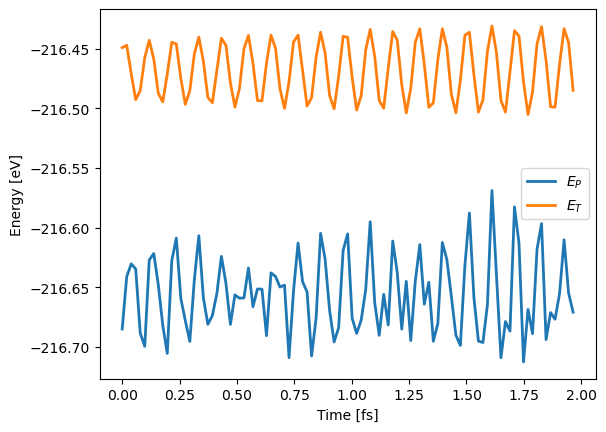

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(time, epot, lw=2, label='$E_P$')
# ax.plot(time, ekin, lw=2, label='$E_K$')
ax.plot(time, epot + ekin, lw=2, label='$E_T$')
ax.set_xlabel('Time [fs]')
ax.set_ylabel('Energy [eV]')
ax.legend()

Text(0, 0.5, '$\\langle |F| \\rangle$ [eV/$\\AA$]')

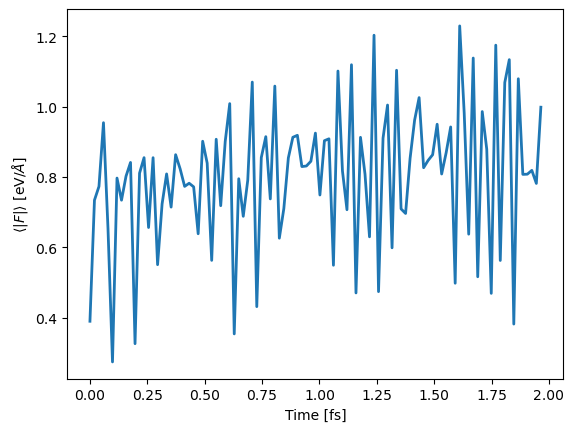

In [4]:
fig, ax = plt.subplots()
ax.plot(time, forc, lw=2)
ax.set_xlabel('Time [fs]')
ax.set_ylabel(r'$\langle |F| \rangle$ [eV/$\AA$]')

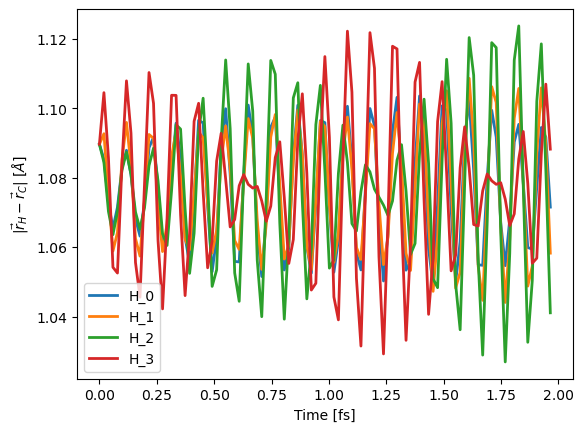

In [5]:
fig, ax = plt.subplots()
for i in range(distances.shape[1]):
    ax.plot(time, distances[:, i], lw=2, label=f"H_{i}")
ax.set_xlabel('Time [fs]')
ax.set_ylabel(r'$|\vec{r}_H - \vec{r}_C|$ [$\AA$]')
ax.legend()

In [6]:
traj[0].get_forces(), traj[0].get_positions()

(array([[ 3.99872191e-15,  1.50185636e-14, -1.99149938e-07],
        [-2.81616200e-01, -2.81616200e-01, -2.81616191e-01],
        [ 2.81616200e-01,  2.81616200e-01, -2.81616191e-01],
        [-2.81616282e-01,  2.81616282e-01,  2.81616290e-01],
        [ 2.81616282e-01, -2.81616282e-01,  2.81616290e-01]]),
 array([[ 0.      ,  0.      ,  0.      ],
        [ 0.629118,  0.629118,  0.629118],
        [-0.629118, -0.629118,  0.629118],
        [ 0.629118, -0.629118, -0.629118],
        [-0.629118,  0.629118, -0.629118]]))

In [7]:
traj[1].get_forces(), traj[1].get_positions()

(array([[-0.06597384,  0.04704293, -0.07070886],
        [-0.27408002, -0.32452179, -0.24948243],
        [ 0.29296861,  0.33771286, -0.3070752 ],
        [-0.27606868,  0.28530775,  0.29056379],
        [ 0.32315393, -0.34554176,  0.33670271]]),
 array([[ 0.00099661, -0.00137645,  0.00221938],
        [ 0.63095367,  0.63176622,  0.62680271],
        [-0.62809454, -0.63179326,  0.63239297],
        [ 0.62900472, -0.63105478, -0.62787232],
        [-0.62400287,  0.63360471, -0.62971455]]))

In [8]:
from ase.visualize import view
view(traj[0], viewer='x3d')

In [9]:
view(traj[-1], viewer='x3d')